In [402]:
import pandas as pd 
import numpy as np

In [403]:
data = pd.read_csv("stocks.csv")

In [404]:
# future model with this dataset is going to predict final price of Tesla company actions ("Adj Close")
data 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [405]:
# column datatypes output 
data_types = data.dtypes
print(data_types)



Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [406]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [407]:
# we should change "Date" column form from str to int form 
data['Date'] = pd.to_datetime(data['Date']).astype(int)  



In [408]:
data 

,Date,Open,High,Low,Close,Adj Close,Volume
0,1277769600000000000,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,1277856000000000000,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,1277942400000000000,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,1278028800000000000,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,1278374400000000000,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,1647561600000000000,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,1647820800000000000,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,1647907200000000000,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,1647993600000000000,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [409]:
from sklearn.model_selection import train_test_split
x = data.drop("Adj Close", axis=1)

y = data["Adj Close"]

In [410]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [411]:
# we are going to use KNN method to our regression exercise
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(13)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [412]:
model.score(x_train, y_train)

0.9973832619787085

In [413]:
model.score(x_test, y_test)

0.9964513688532558

In [414]:
pred_test = model.predict(x_test)


data_pred = pd.DataFrame({"Actuals": y_test.squeeze(), "Predictions": pred_test.squeeze()})
print(data_pred)


         Actuals  Predictions
2491  165.520004   165.543693
1492   43.792000    44.097385
1016   45.340000    44.447847
361     6.520000     6.408462
113     6.474000     6.472308
...          ...          ...
1869   61.507999    63.113846
2483  162.257996   157.944310
649     7.606000     7.340308
2191   57.992001    54.964769
573     5.880000     5.752923

[592 rows x 2 columns]


In [416]:
# lets add prediction column to data dataset based on x-feature data
data['Predictions'] = model.predict(x)
# lets bring "date" back to original type of data - object
data['Date'] = pd.to_datetime(data['Date']).astype(object)  
# lets sort the data by date 
data = data.sort_values(by='Date')

In [417]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Predictions
0,2010-06-29 00:00:00,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,3.906462
1,2010-06-30 00:00:00,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,3.906462
2,2010-07-01 00:00:00,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,3.906462
3,2010-07-02 00:00:00,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,3.906462
4,2010-07-06 00:00:00,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,3.906462
...,...,...,...,...,...,...,...,...
2951,2022-03-18 00:00:00,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,867.268451
2952,2022-03-21 00:00:00,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,867.268451
2953,2022-03-22 00:00:00,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,867.268451
2954,2022-03-23 00:00:00,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400,867.268451


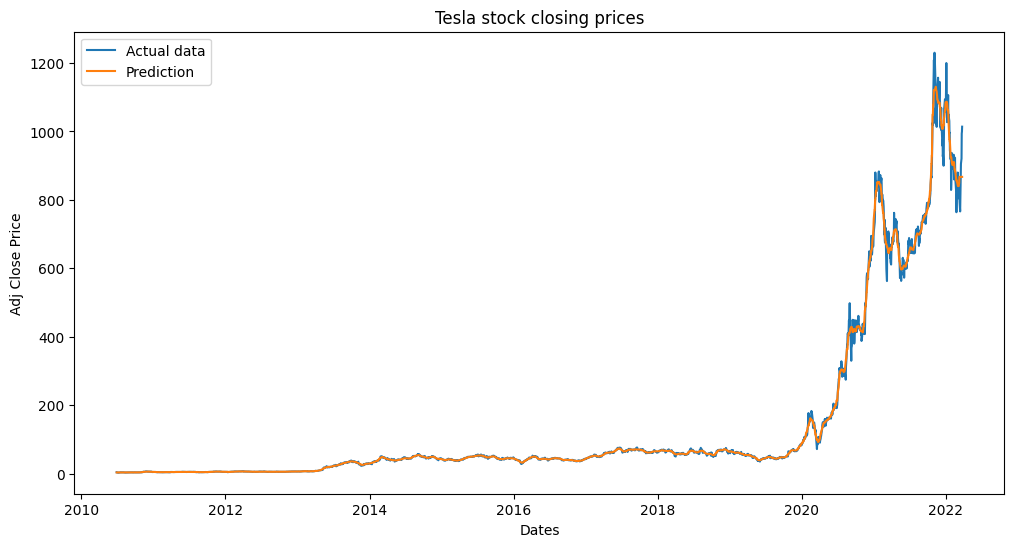

In [420]:
# plotting 

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
# plot actuals
plt.plot(data['Date'], data['Adj Close'], label='Actual data', marker=' ')
# plot predictions
plt.plot(data['Date'], data['Predictions'], label='Prediction', marker='')

plt.xlabel('Dates')
plt.ylabel('Adj Close Price')
plt.title('Tesla stock closing prices')
plt.legend()

plt.show()
